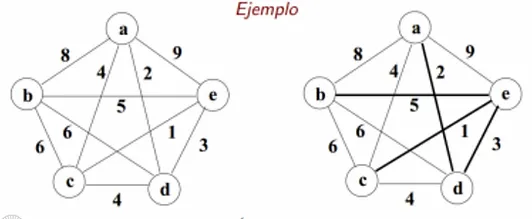

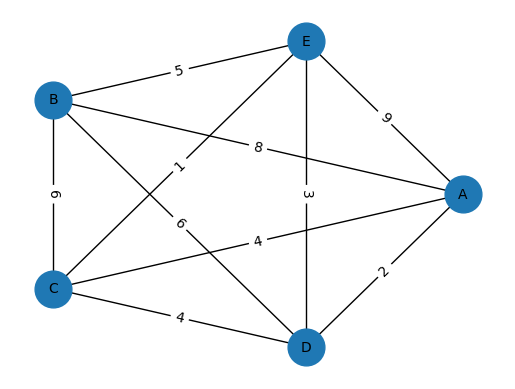

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
G.add_edges_from([('A', 'E', {'weight': 9}), ('A', 'B', {'weight': 8}),
                  ('A', 'C', {'weight': 4}), ('A', 'D', {'weight': 2}),
                  ('B', 'E', {'weight': 5}), ('B', 'C', {'weight': 6}),
                  ('B', 'D', {'weight': 6}), ('C', 'D', {'weight': 4}),
                  ('C', 'E', {'weight': 1}), ('D', 'E',  {'weight': 3})])

# Get edge weights and labels
edge_labels = nx.get_edge_attributes(G, 'weight')

# Create a spring layout for positions
pos = nx.circular_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=1)

nx.draw_networkx_labels(G, pos, font_size=10, 
 font_family='sans-serif')

# Draw edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()    

In [3]:
G.nodes

NodeView(('A', 'E', 'B', 'C', 'D'))

In [4]:
list(G.nodes)

['A', 'E', 'B', 'C', 'D']

In [5]:
G.edges

EdgeView([('A', 'E'), ('A', 'B'), ('A', 'C'), ('A', 'D'), ('E', 'B'), ('E', 'C'), ('E', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')])

In [6]:
list(G.edges)

[('A', 'E'),
 ('A', 'B'),
 ('A', 'C'),
 ('A', 'D'),
 ('E', 'B'),
 ('E', 'C'),
 ('E', 'D'),
 ('B', 'C'),
 ('B', 'D'),
 ('C', 'D')]

In [7]:
for n, nbrs in G.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       print(f"({n}, {nbr}, {wt})")


(A, E, 9)
(A, B, 8)
(A, C, 4)
(A, D, 2)
(E, A, 9)
(E, B, 5)
(E, C, 1)
(E, D, 3)
(B, A, 8)
(B, E, 5)
(B, C, 6)
(B, D, 6)
(C, A, 4)
(C, B, 6)
(C, D, 4)
(C, E, 1)
(D, A, 2)
(D, B, 6)
(D, C, 4)
(D, E, 3)


:![krusta;](prim.jpg)

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
def prim(G: nx.Graph):
    # pre: pesos un diccionario donde las claves son las aristas y los valores son reales no negativos. 
    # post: devuelve mst un MST de G. 
    def adyacentes(G:nx.Graph,u):
        adj={}
        for v , neightbors in G.adjacency():
            if v == u:
               adj = neightbors
               break     
        return adj       
    mst = nx.Graph()
    #odernar los vertices por peso
    edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'])
    r = next(iter(edges)) # toma un vértice de G sin quitarlo
    clave, padre = {}, {} # dos diccionarios vacíos. El primero es una "cola de prioridad". El segundo indicará quien será el padre en el MST.
    maxV = max(edges,key=lambda x: x[2]['weight'])
    # INFINITO es un valor más alto que todos los pesos
    INFINITO = maxV[2]['weight']* 2 
    for u  in G.nodes:
        clave[u] = INFINITO 
        padre[u] = None
        #padre[u] = None # Cuando el algoritmo termina padre[v] será el padre de v en el MST, para los v que no son raíz (el vértice r). 
    raiz = r[0]
    clave[raiz]=0
    cola = list(G.nodes)
    while len(cola) > 0:
        u = min([[clave[v],v] for v in cola])[1] # un vértice de cola con clave[u] mínima
        cola.remove(u)
        adj =adyacentes(G,u)
        for v in adj:
            data = adj[v]
            if v in cola and data['weight'] < clave[v]:
                padre[v] = u
                clave[v] = data['weight']
    nodes= list(G.nodes)
    nodes.remove(raiz)
    for v in nodes:
        mst.add_edge(v, padre[v], weight=clave[v])
    return mst

In [9]:
mst = prim(G)

In [10]:
print(f"Nodos del grafo: {mst.nodes}")
print(f"Ejes del grafo: {mst.edges}")

Nodos del grafo: ['A', 'D', 'B', 'E', 'C']
Ejes del grafo: [('A', 'D'), ('D', 'E'), ('B', 'E'), ('E', 'C')]


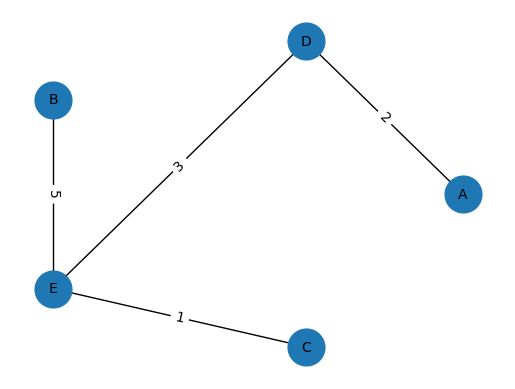

In [11]:
# Get edge weights and labels
edge_labels = nx.get_edge_attributes(mst, 'weight')

# Create a spring layout for positions
pos = nx.circular_layout(mst)

# Draw nodes and edges
nx.draw_networkx_nodes(mst, pos, node_size=700)
nx.draw_networkx_edges(mst, pos, width=1)

nx.draw_networkx_labels(mst, pos, font_size=10, 
 font_family='sans-serif')

# Draw edge labels
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()    

(C,E,1);(A,D,2);(D,E,3);(B,E,5)

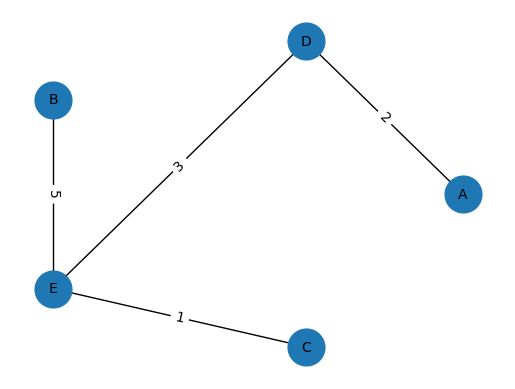

In [12]:
G2 = nx.Graph()
G2.add_edges_from([('A', 'D', {'weight': 2}),
                   ('B', 'E', {'weight': 5}), 
                   ('C', 'E', {'weight': 1}), 
                   ('D', 'E',  {'weight': 3})])

# Get edge weights and labels
edge_labels = nx.get_edge_attributes(G2, 'weight')

# Create a spring layout for positions
pos = nx.circular_layout(G2)

# Draw nodes and edges
nx.draw_networkx_nodes(G2, pos, node_size=700)
nx.draw_networkx_edges(G2, pos, width=1)

nx.draw_networkx_labels(G2, pos, font_size=10, 
 font_family='sans-serif')

# Draw edge labels
nx.draw_networkx_edge_labels(G2, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()    

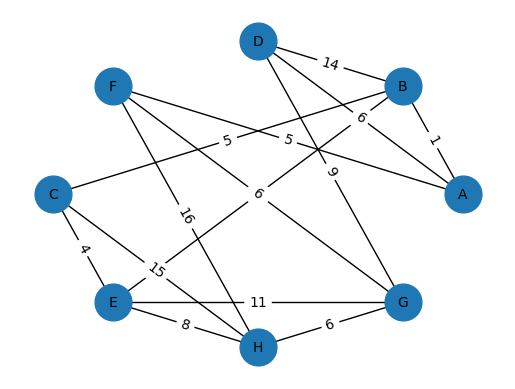

In [23]:
G3 = nx.Graph()
G3.add_edges_from([('A', 'B', {'weight': 1}),
                   ('A', 'D', {'weight': 6}), 
                   ('A', 'F', {'weight': 5}), 
                   ('B', 'C',  {'weight': 5}),
                   ('B', 'E',  {'weight': 3}),
                   ('B', 'D',  {'weight': 14}),
                   ('C', 'E',  {'weight': 4}),
                   ('C', 'H',  {'weight': 15}),
                   ('D', 'G',  {'weight': 9}),
                   ('E', 'G',  {'weight': 11}),
                   ('E', 'H',  {'weight': 8}),
                   ('D', 'G',  {'weight': 9}),
                   ('F', 'G',  {'weight': 6}),
                   ('F', 'H',  {'weight': 16}),
                   ('G', 'H',  {'weight': 6}),
                   ])

# Get edge weights and labels
edge_labels = nx.get_edge_attributes(G3, 'weight')

# Create a spring layout for positions
pos = nx.circular_layout(G3)

# Draw nodes and edges
nx.draw_networkx_nodes(G3, pos, node_size=700)
nx.draw_networkx_edges(G3, pos, width=1)

nx.draw_networkx_labels(G3, pos, font_size=10, 
 font_family='sans-serif')

# Draw edge labels
nx.draw_networkx_edge_labels(G3, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()    

In [24]:
mst = prim(G3)

In [25]:
print(f"Nodos del grafo: {mst.nodes}")
print(f"Ejes del grafo: {mst.edges}")

Nodos del grafo: ['B', 'A', 'D', 'F', 'C', 'E', 'H', 'G']
Ejes del grafo: [('B', 'A'), ('B', 'E'), ('A', 'D'), ('A', 'F'), ('F', 'G'), ('C', 'E'), ('H', 'G')]


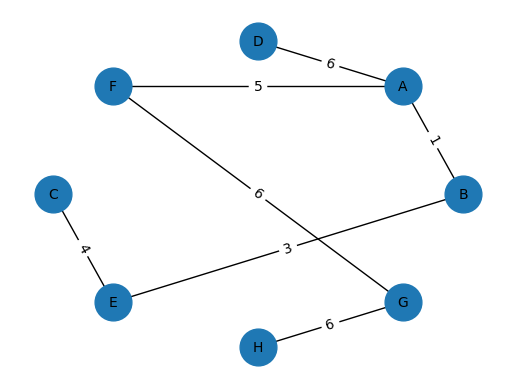

In [26]:
# Get edge weights and labels
edge_labels = nx.get_edge_attributes(mst, 'weight')

# Create a spring layout for positions
pos = nx.circular_layout(mst)

# Draw nodes and edges
nx.draw_networkx_nodes(mst, pos, node_size=700)
nx.draw_networkx_edges(mst, pos, width=1)

nx.draw_networkx_labels(mst, pos, font_size=10, 
 font_family='sans-serif')

# Draw edge labels
nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()    

In [27]:
peso = 6 + 5+ +1 + 6+3+4+6
print(peso)

31
